In [1]:
import matplotlib.pyplot as plt # plotting library
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
from scipy import interpolate

In [2]:
def period(n):
    fib_list = ["a", "b"]*n
    return fib_list

def period(n):
    fib_list = ["a", "b"]*n
    return fib_list

def mutual(a,b,psi):
    a=[a,a+1]
    b=[b,b+1]
    ab=np.hstack((a,b))
    Sent=basis.ent_entropy(psi,sub_sys_A=a,
                                return_rdm=None,density=False,alpha=1.0,sparse_diag=False)
    sa=(Sent.get('Sent_A'))
    Sent=basis.ent_entropy(psi,sub_sys_A=b,
                                return_rdm=None,density=False,alpha=1.0,sparse_diag=False)
    sb=(Sent.get('Sent_A'))
    Sent=basis.ent_entropy(psi,sub_sys_A=ab,
                                return_rdm=None,density=False,alpha=1.0,sparse_diag=False)
    sab=(Sent.get('Sent_A'))
    I=sa+sb-sab
    
    return I
def lat(dx):
    site=[]
    for i in range(10):
        dx=dx     
        positions = [(2*i), 2*(i+dx)]
        if 0 <= 2*(i+dx) < 19:
            site.append([2*i, 2*(i+dx)])
    return site
def corr(psi,dx):
    corrf=[]
    lattice=lat(dx)
    sizen=np.shape(lat(dx))[0]
    for i in range(sizen):
        #print(i)
        Im=mutual(lattice[i][0],lattice[i][1],psi)
        corrf.append(Im)
        #print(Im,lattice[i][0],lattice[i][1])
    return corrf

In [3]:
L=20
Jr=1.0 # spin=spin interaction
basis = spin_basis_1d(L,pauli=False,m=0) 
##H0
H0=[[-Jr,  4*i,(4*i+1),(4*i+2),(4*i+3)]  for i in range(L//4)] 
no_checks = dict(check_herm=False,check_symm=False,check_pcon=False)
# static and dynamic lists
static=[["+--+",H0],["-++-",H0]]
dynamic=[]
###### construct Hamiltonian
Hdeff=hamiltonian(static,dynamic,basis=basis,dtype=np.float64,**no_checks)
va,ve=Hdeff.eigsh(k=2)
#va,ve=Hdeff.eigh(tlisteff[5])
psi0=ve[:,0]
Sent=basis.ent_entropy(psi0,sub_sys_A=np.arange(L//2)*2,
                            return_rdm=None,density=False,alpha=1.0,sparse_diag=False)
print(Sent.get('Sent_A'))
ent0=Sent.get('Sent_A')
Ilist0=[]
for iii in range(1,10):
    Ilist0.append(np.mean(corr(psi0,iii)))


3.4657359028076833


In [4]:

Jr=1.0 # spin=spin interaction
basis = spin_basis_1d(L,pauli=False,m=0) 
##H0
H0=[[-Jr,  4*i,(4*i+1),(4*i+2),(4*i+3)]  for i in range(L//4)] 
H1=[[-Jr,  4*i+2,(4*i+3),(4*i+4)%L,(4*i+5)%L]  for i in range(L//4)] 
no_checks = dict(check_herm=False,check_symm=False,check_pcon=False)
# static and dynamic lists
static=[["+--+",H0],["-++-",H0],["+--+",H1],["-++-",H1]]
dynamic=[]
###### construct Hamiltonian
Hdeff=hamiltonian(static,dynamic,basis=basis,dtype=np.float64,**no_checks)
va,ve=Hdeff.eigsh(k=3)
#va,ve=Hdeff.eigh(tlisteff[5])
psitar=ve[:,0]
Sent=basis.ent_entropy(psitar,sub_sys_A=np.arange(L//2)*2,
                            return_rdm=None,density=False,alpha=1.0,sparse_diag=False)
print(Sent.get('Sent_A'))

4.964959568619581


In [5]:

params= [8.88026234e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
         1.00000000e+00, 6.61164514e-01, 1.00000000e+00, 1.00000000e+00,
         1.00000000e+00, 1.00000000e-05, 1.00000000e+00, 1.00000000e+00,
         1.00000000e+00, 1.00000000e-05, 1.00000000e+00, 1.00000000e+00,
         1.00000000e+00, 1.00000000e-05, 1.00000000e+00, 1.00000000e-05,
         1.00000000e+00, 1.00000000e-05, 1.00000000e+00, 4.66891949e-03,
         1.00000000e+00, 1.00000000e-05, 1.00000000e+00, 1.00000000e+00,
         1.00000000e+00, 1.00000000e+00, 2.66457921e-01, 1.00000000e+00,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
         1.00000000e+00, 1.00000000e-05, 1.00000000e+00, 1.00000000e+00,
         1.00000000e-05, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
         1.00000000e+00, 1.00000000e-05, 1.00000000e-05, 1.00000000e-05,
         1.00000000e+00, 1.00000000e-05, 1.00000000e+00, 1.00000000e-05,
         1.00000000e+00, 1.00000000e-05, 1.00000000e-05, 1.00000000e-05,]
TT=0.1
step=2
order=30
s=period(order)


hlist=params





Jr=1
Jp=0        
psiini=psi0
tlist=[0]
fidelist=[np.abs(psiini.dot(psitar))**2]
entlist=[ent0]
Ilist=[]
for i in range(len(s)):
   
    
    H0=[[-Jr,  4*i,(4*i+1),(4*i+2),(4*i+3)]  for i in range(L//4)] 

    
    
    H1=[[-Jr,  4*i+2,(4*i+3),(4*i+4)%L,(4*i+5)%L]  for i in range(L//4)] 
   
    #print(H0,H1)
    no_checks = dict(check_herm=False,check_symm=False,check_pcon=False)
    # static and dynamic lists
    static0=[["+--+",H0],["-++-",H0]]
    static1=[["+--+",H1],["-++-",H1]]
    dynamic=[]
    ###### construct Hamiltonian
    Hd0=hamiltonian(static0,dynamic,basis=basis,dtype=np.float64,**no_checks)
    Hd1=hamiltonian(static1,dynamic,basis=basis,dtype=np.float64,**no_checks)
    if i>0:
        psiini=psi_list[:,-1]
    if s[i] == 'a':
        tmax0=TT*hlist[i]
        tlist0=np.linspace(0,tmax0,step)
        psi_list=Hd0.evolve(psiini,0,tlist0)
        ttt=tlist[-1]+tmax0
    
    elif s[i] == 'b':
        tmax1=TT*hlist[i]
        tlist1=np.linspace(0,tmax1,step)
        psi_list=Hd1.evolve(psiini,0,tlist1)
        ttt=tlist[-1]+tmax1
    psi=psi_list[:,-1]
    fidelist.append(np.abs(psi.dot(psitar))**2)
    dlist=[]
    
    for iii in range(1,10):
        dlist.append(np.mean(corr(psi,iii)))
    Ilist.append(dlist)
    tlist.append(ttt)
    Sent=basis.ent_entropy(psi,sub_sys_A=np.arange(L//2)*2,return_rdm=None,density=False,alpha=1.0,sparse_diag=False)
    ent=(Sent.get('Sent_A'))
    entlist.append(ent)
    print('i = % 3d | % 3d,'%(i, len(s)),end='\r')

    


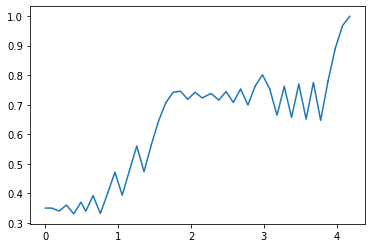

In [6]:
plt.plot(tlist,fidelist)

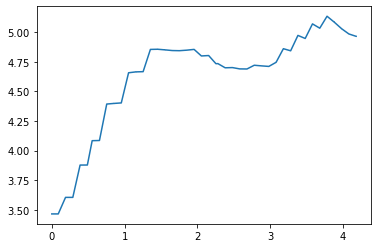

In [9]:
plt.plot(tlist,entlist)

In [18]:
a=[tlist,entlist,fidelist,Ilist]


In [21]:
np.shape(a)
import pandas as pd


df = pd.DataFrame(a)

df.to_csv('opt_evo.csv', index=False)